# Clinical Data - Exploratory Data Analysis
This notebook performs comprehensive exploratory data analysis on the simulated clinical dataset.

In [1]:
# Importing the required libraries
import sys
import os

print(f"Notebook is running from: {os.getcwd()}")

# Add parent directory to path
parent_dir = os.path.abspath('..')
sys.path.insert(0, parent_dir)
print(f"Added to path: {parent_dir}")

# Change working directory to parent
os.chdir(parent_dir)
print(f"Changed working directory to: {os.getcwd()}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_utils import load_data, get_missing_summary, get_descriptive_stats
from src.plotting import plot_missing_data, plot_distributions, plot_correlation_matrix

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Notebook is running from: c:\Users\USER\Downloads\Tech assessment\notebook
Added to path: c:\Users\USER\Downloads\Tech assessment
Changed working directory to: c:\Users\USER\Downloads\Tech assessment


In [2]:
data_path = "data/simulated_clinical_data.csv"
df = load_data(data_path)
df.head()

,ID,DOSE,AGE,WT,SEX,CMAX,AUC,RESPONSE
0,PT0001,200,62.450712,86.354829,M,26.249404,251.322910,1.0
1,PT0002,400,52.926035,61.167520,F,87.865616,598.853233,1.0
2,PT0003,200,64.715328,88.044089,F,33.001143,274.196583,1.0
3,PT0004,100,77.845448,95.334568,F,6.152791,49.149857,0.0
4,PT0005,400,51.487699,81.201524,F,37.452883,294.004531,1.0


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData Type: {df.info()}")

Dataset shape: (600, 8)

Columns: ['ID', 'DOSE', 'AGE', 'WT', 'SEX', 'CMAX', 'AUC', 'RESPONSE']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        600 non-null    object 
 1   DOSE      600 non-null    int64  
 2   AGE       600 non-null    float64
 3   WT        600 non-null    float64
 4   SEX       600 non-null    object 
 5   CMAX      450 non-null    float64
 6   AUC       450 non-null    float64
 7   RESPONSE  480 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 37.6+ KB

Data Type: None


In [4]:
# Missing data Summary
missing_summary = get_missing_summary(df)
print(f"Missing Data Summary:\n{missing_summary}")

Missing Data Summary:
  Variables  Missing_Count  Missing_Percent
5      CMAX            150             25.0
6       AUC            150             25.0
7  RESPONSE            120             20.0


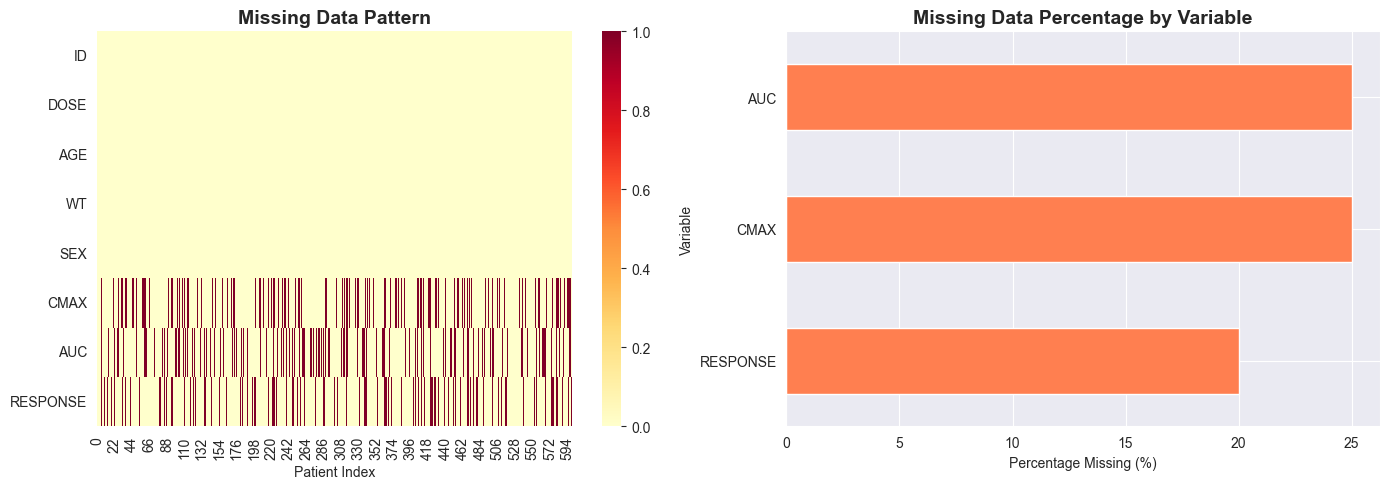

In [5]:
# Visualize missing data
plot_missing_data(df);

In [6]:
# Descriptive Statistics
descriptive_stats = get_descriptive_stats(df)
print(f"Descriptive Statistics:\n{descriptive_stats}")

Descriptive Statistics:
          count    mean     std     min     25%     50%     75%      max  \
DOSE      600.0  227.67  117.43  100.00  100.00  200.00  400.00   400.00   
AGE       600.0   54.67   14.13   18.00   44.58   55.12   64.35    85.00   
WT        600.0   76.47   14.76   45.00   66.56   76.59   85.89   114.49   
CMAX      450.0   31.07   20.90    5.19   15.22   25.47   41.86   116.69   
AUC       450.0  247.05  182.97   25.22  115.03  194.59  324.04  1187.91   
RESPONSE  480.0    0.55    0.50    0.00    0.00    1.00    1.00     1.00   

          missing  missing_pct  
DOSE            0          0.0  
AGE             0          0.0  
WT              0          0.0  
CMAX          150         25.0  
AUC           150         25.0  
RESPONSE      120         20.0  


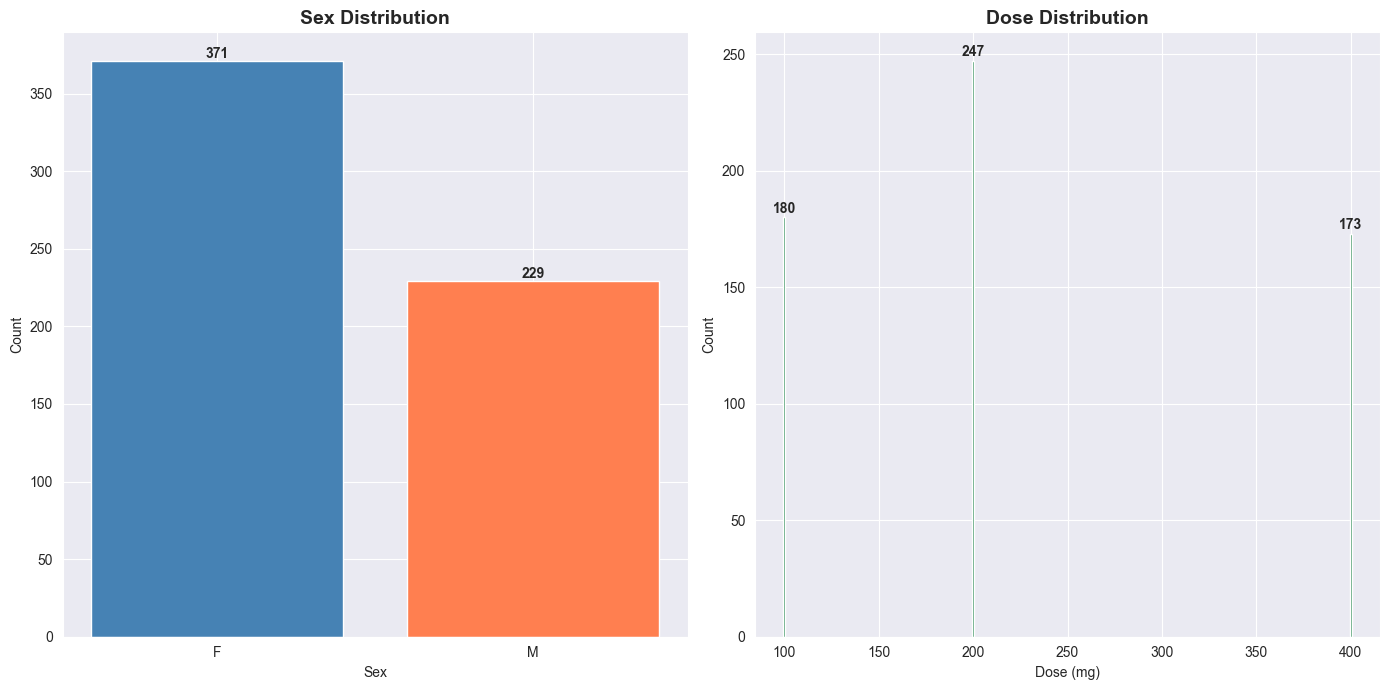

In [7]:
#Categorical Variable distribution
# Sex distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sex_counts = df['SEX'].value_counts()
axes[0].bar(sex_counts.index, sex_counts.values, color=['steelblue', 'coral'])
axes[0].set_title('Sex Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
for i, v in enumerate(sex_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Dose
dose_counts = df['DOSE'].value_counts().sort_index()
axes[1].bar(dose_counts.index, dose_counts.values, color='seagreen')
axes[1].set_title('Dose Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dose (mg)')
axes[1].set_ylabel('Count')
for i, (k, v) in enumerate(dose_counts.items()):
    axes[1].text(k, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



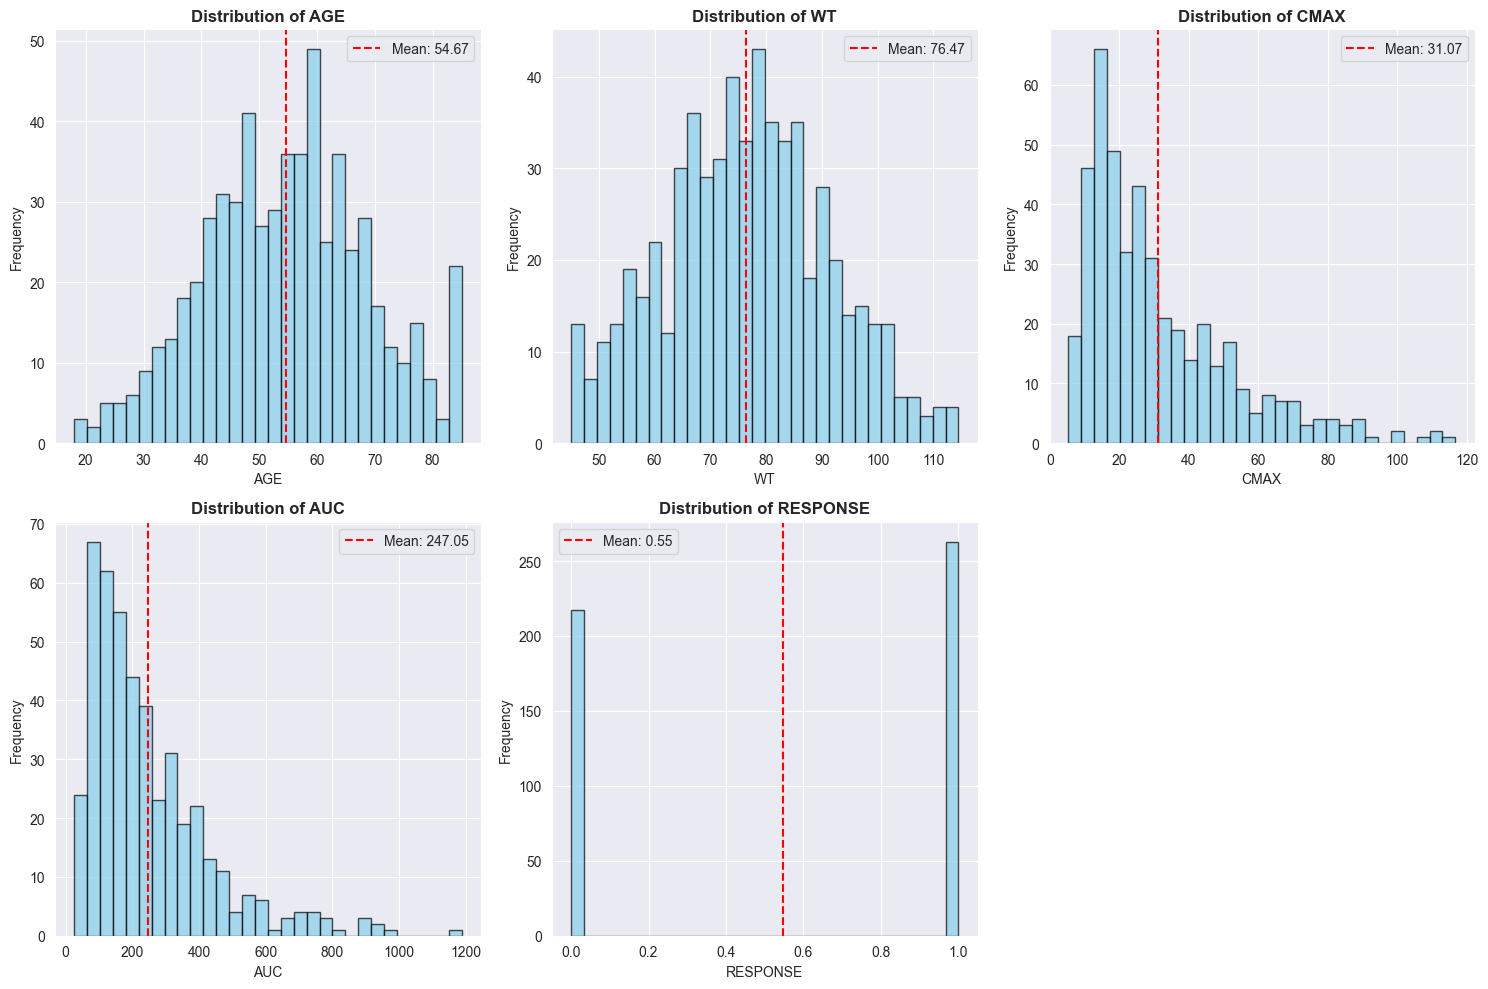

In [8]:
#Continuous Variable Distributions
numeric_vars = ['AGE', 'WT', 'CMAX', 'AUC', 'RESPONSE']
plot_distributions(df, numeric_vars);

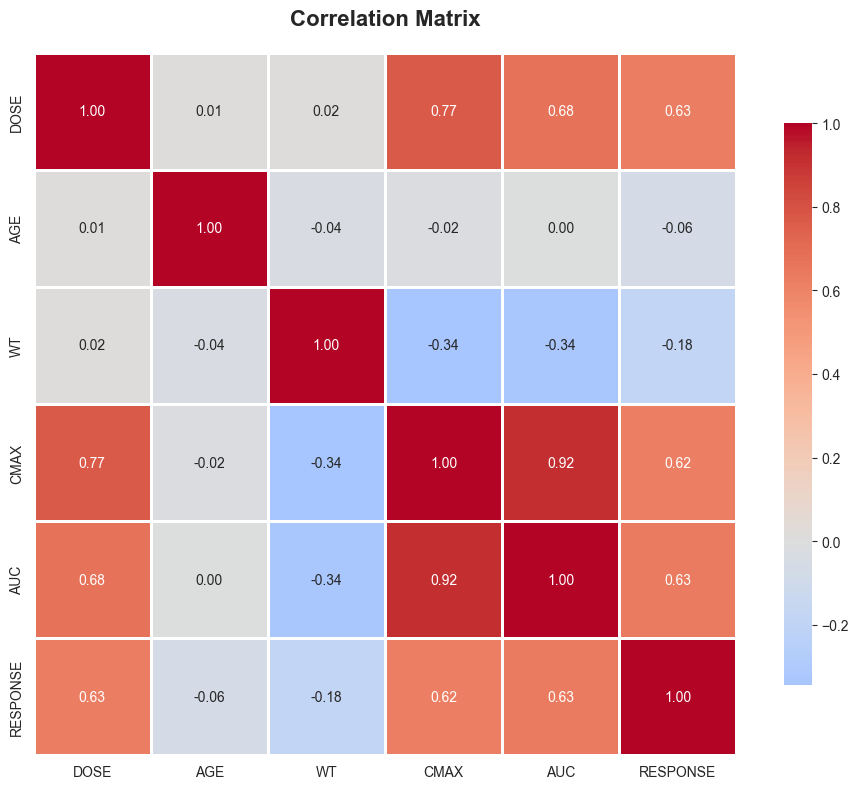

In [9]:
# Correlation Analysis
# Correlation matrix
plot_correlation_matrix(df);

Correlations with RESPONSE:
AUC     0.632684
DOSE    0.628782
CMAX    0.619226
AGE    -0.061258
WT     -0.181614
Name: RESPONSE, dtype: float64


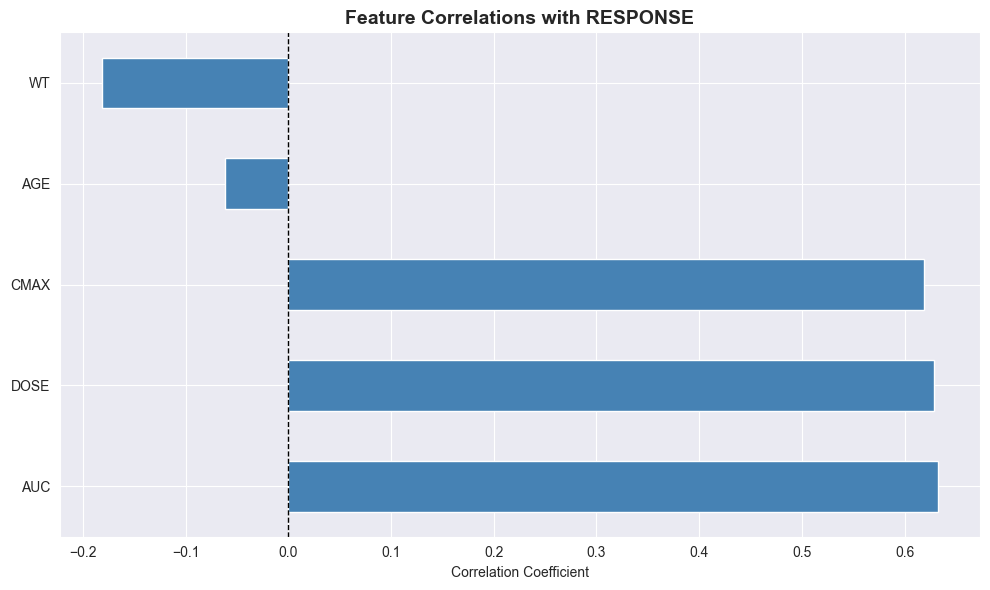

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['RESPONSE'].sort_values(ascending=False)

print("Correlations with RESPONSE:")
print(correlations[correlations.index != 'RESPONSE'])

fig, ax = plt.subplots(figsize=(10, 6))
correlations[correlations.index != 'RESPONSE'].plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Feature Correlations with RESPONSE', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient')
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

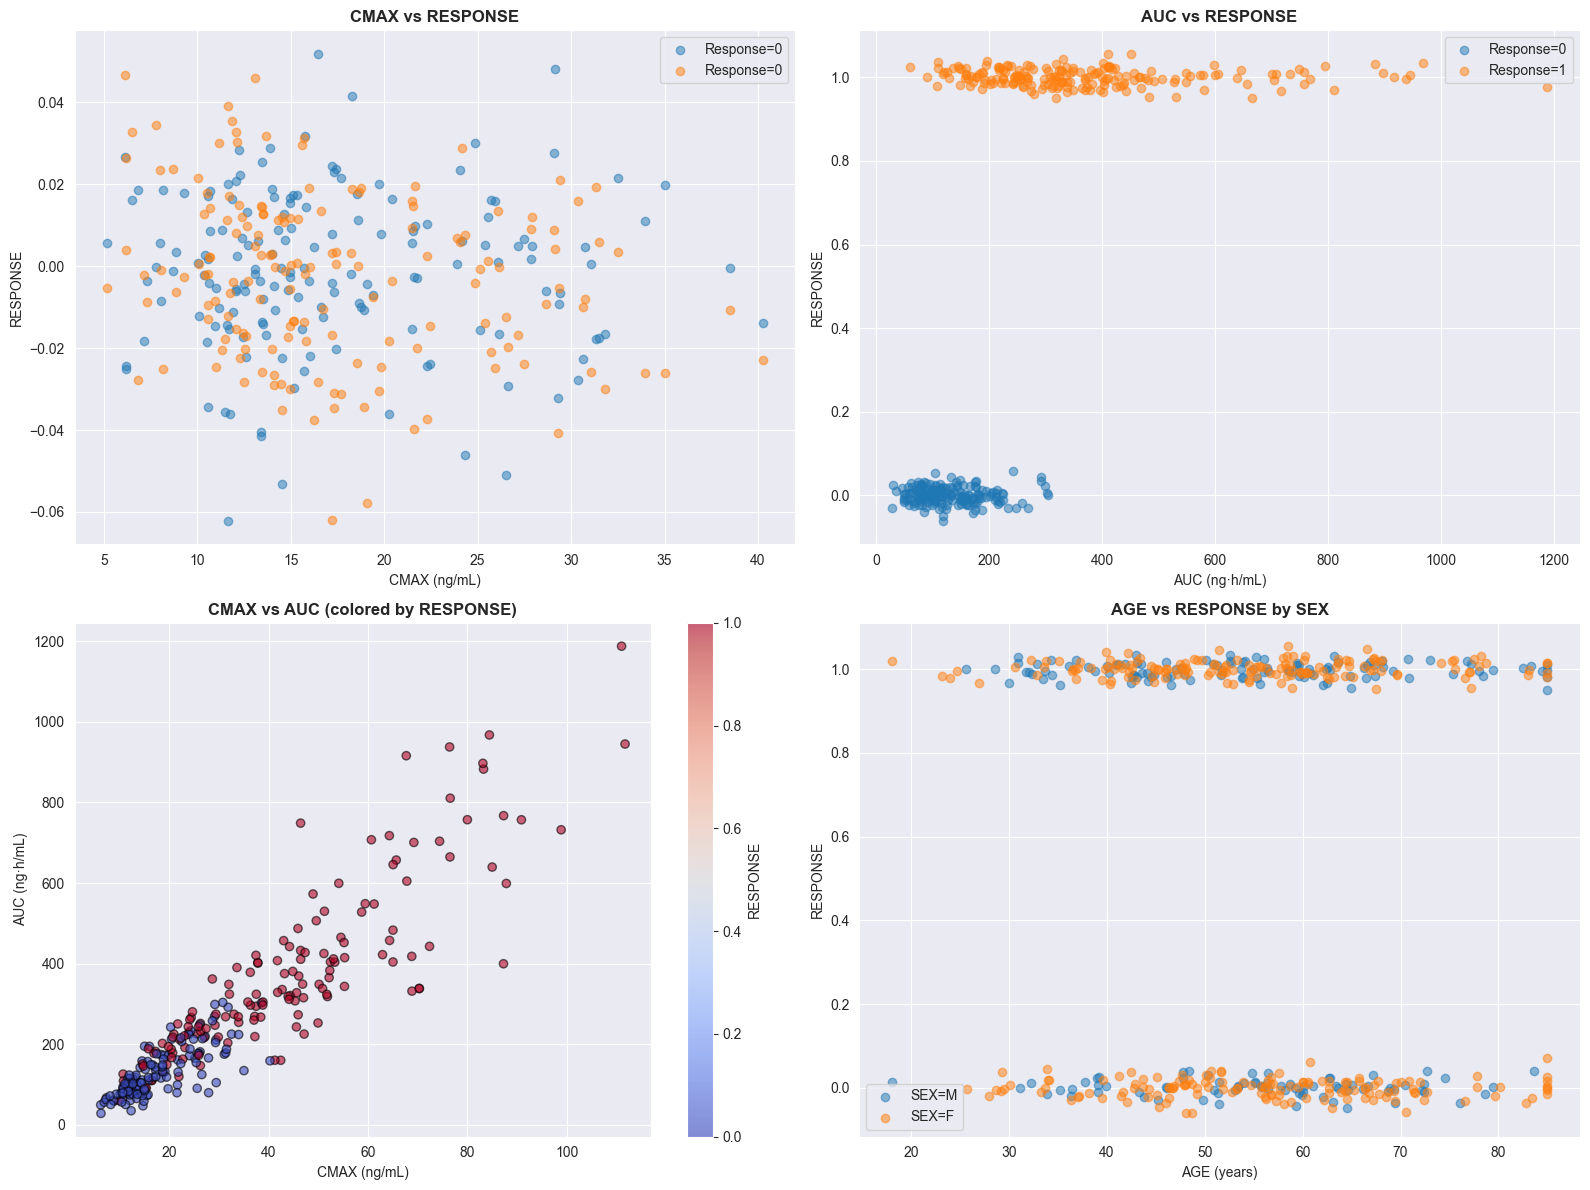

<Figure size 1200x600 with 0 Axes>

In [12]:
# Bivariate Analysis
# Scatter plots(PK parameters vs RESPONSE),
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# CMAX vs RESPONSE
for response in [0, 1]:
    subset = df[df['RESPONSE'] == response]
    axes[0, 0].scatter(
        subset['CMAX'],
        subset['RESPONSE'] + np.random.normal(0, 0.02, len(subset)),
        alpha=0.5,
        label=f'Response={response}'
    )
    axes[0, 0].scatter(
        subset['CMAX'],
        subset['RESPONSE'] + np.random.normal(0, 0.02, len(subset)),
        alpha=0.5,
        label=f'Response={response}'
    )
    axes[0, 0].set_xlabel('CMAX (ng/mL)')
    axes[0, 0].set_ylabel('RESPONSE')
    axes[0, 0].set_title('CMAX vs RESPONSE', fontweight='bold')
    axes[0, 0].legend()

    # AUC vs RESPONSE
    for response in [0, 1]:
        subset = df[df['RESPONSE'] == response]
        axes[0, 1].scatter(
            subset['AUC'],
            subset['RESPONSE'] + np.random.normal(0, 0.02, len(subset)),
            alpha=0.5,
            label=f'Response={response}'
        )
    
    axes[0, 1].set_xlabel('AUC (ng·h/mL)')
    axes[0, 1].set_ylabel('RESPONSE')
    axes[0, 1].set_title('AUC vs RESPONSE', fontweight='bold')
    axes[0, 1].legend()

    # CMAX vs AUC colored by RESPONSE
    scatter = axes[1, 0].scatter(
        df['CMAX'],
        df['AUC'],
        c=df['RESPONSE'],
        cmap='coolwarm',
        alpha=0.6,
        edgecolors='black'
    )
    axes[1, 0].set_xlabel('CMAX (ng/mL)')
    axes[1, 0].set_ylabel('AUC (ng·h/mL)')
    axes[1, 0].set_title('CMAX vs AUC (colored by RESPONSE)', fontweight='bold')
    plt.colorbar(scatter, ax=axes[1, 0], label='RESPONSE')

    # AGE vs RESPONSE by SEX
    for sex in df['SEX'].unique():
        subset = df[df['SEX'] == sex]
        axes[1, 1].scatter(
            subset['AGE'],
            subset['RESPONSE'] + np.random.normal(0, 0.02, len(subset)),
            alpha=0.5,
            label=f'SEX={sex}'
        )
    axes[1, 1].set_xlabel('AGE (years)')
    axes[1, 1].set_ylabel('RESPONSE')
    axes[1, 1].set_title('AGE vs RESPONSE by SEX', fontweight='bold')
    axes[1, 1].legend()
    plt.tight_layout()
    plt.show()


Response Rate by Dose Level:
      Response_Rate  Total_N  Responders
DOSE                                    
100        0.134752      141        19.0
200        0.534392      189       101.0
400        0.953333      150       143.0


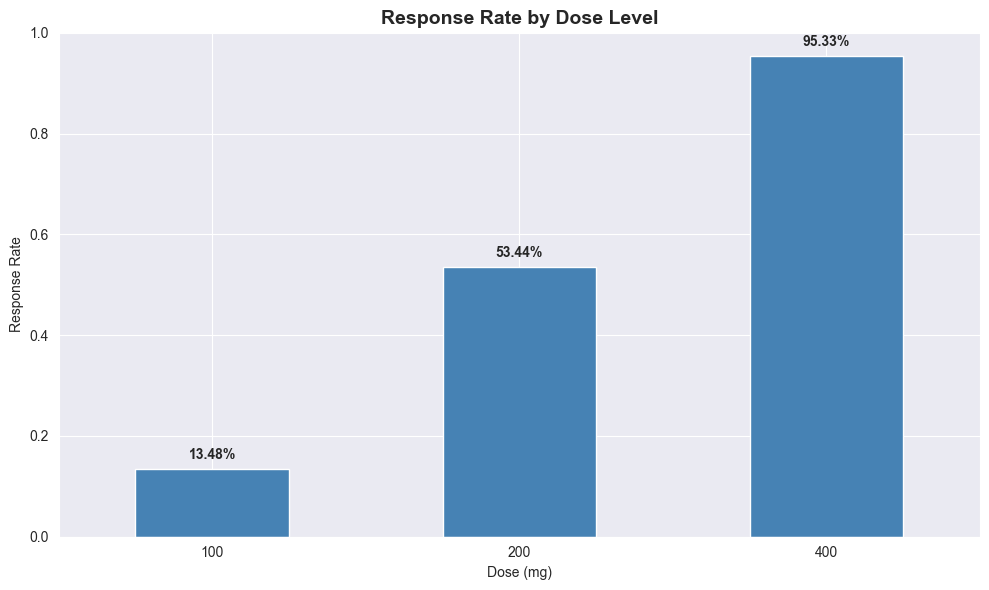

In [13]:
# Group Comparisons
print("Response Rate by Dose Level:")
response_by_dose = df.groupby('DOSE')['RESPONSE'].agg(['mean', 'count', 'sum'])
response_by_dose.columns = ['Response_Rate', 'Total_N', 'Responders']
print(response_by_dose)
fig, ax = plt.subplots(figsize=(10, 6))
response_by_dose['Response_Rate'].plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Response Rate by Dose Level', fontsize=14, fontweight='bold')
ax.set_xlabel('Dose (mg)')
ax.set_ylabel('Response Rate')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
for i, v in enumerate(response_by_dose['Response_Rate']):
    ax.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
# Response rate by sex
print("\nResponse Rate by Sex:")
response_by_sex = df.groupby('SEX')['RESPONSE'].agg(['mean', 'count', 'sum'])
response_by_sex.columns = ['Response_Rate', 'Total_N', 'Responders']
print(response_by_sex)


Response Rate by Sex:
     Response_Rate  Total_N  Responders
SEX                                    
F         0.518771      293       152.0
M         0.593583      187       111.0


In [15]:
# PK parameters by dose
print("\nMean PK Parameters by Dose:")
pk_by_dose = df.groupby('DOSE')[['CMAX', 'AUC']].agg(['mean', 'std', 'count'])
print(pk_by_dose)


Mean PK Parameters by Dose:
           CMAX                          AUC                  
           mean        std count        mean         std count
DOSE                                                          
100   13.983417   4.208322   138  114.785824   52.286291   135
200   27.435979  10.217739   186  220.563279  108.843795   194
400   55.132746  21.684175   126  437.073953  214.312487   121


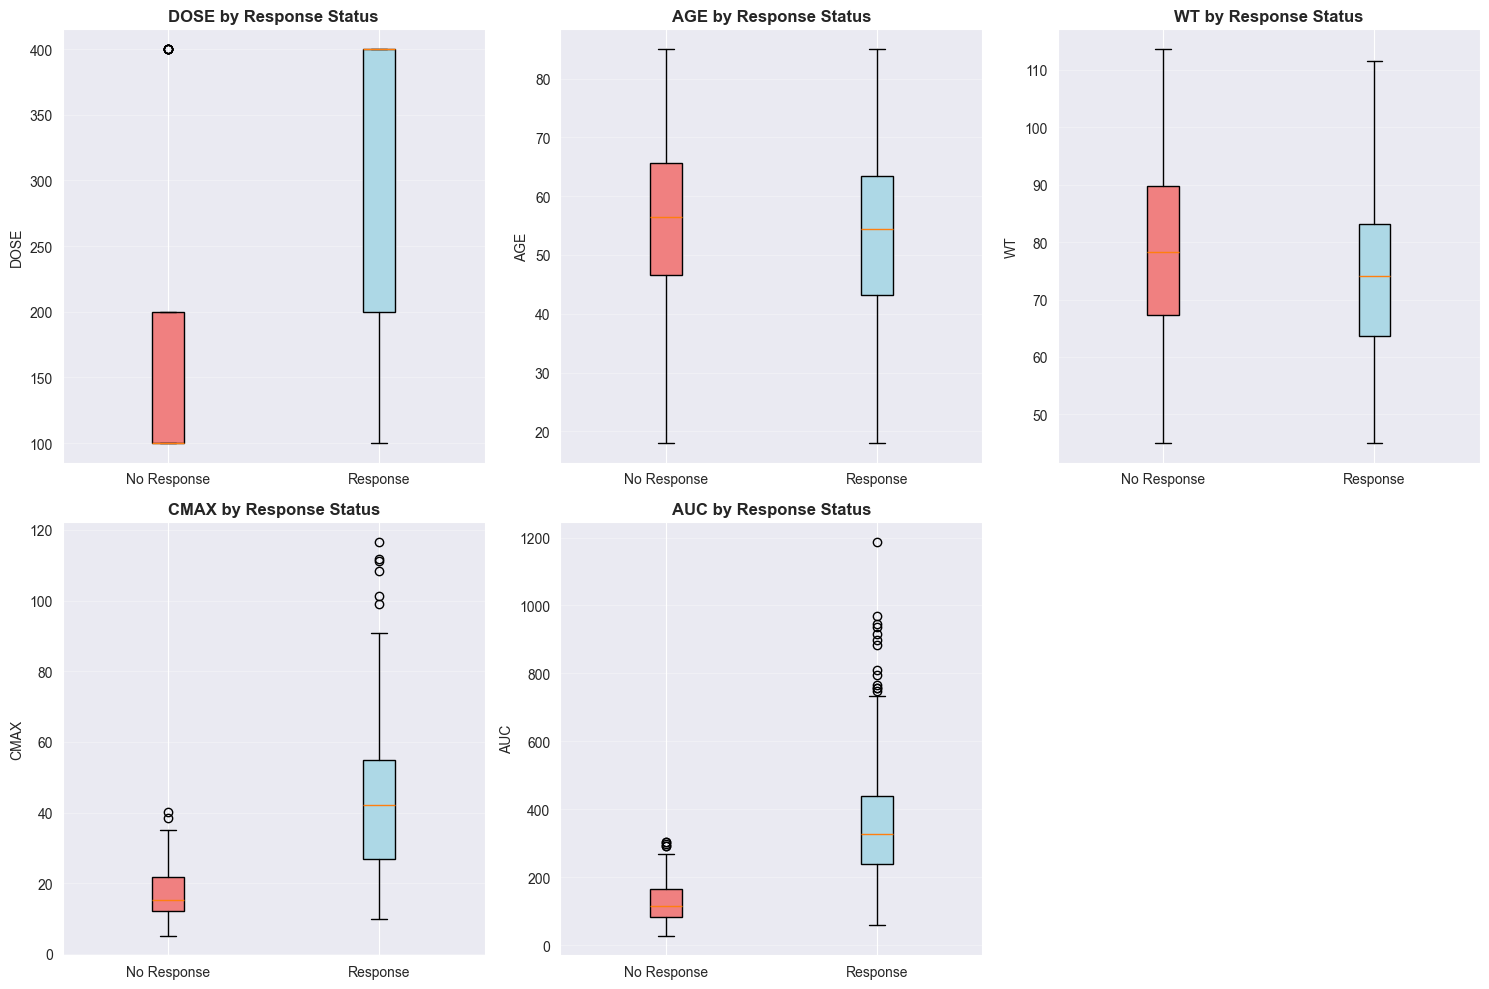

In [16]:
# Boxplots comparing responders vs non-responders
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

vars_to_plot = ['DOSE', 'AGE', 'WT', 'CMAX', 'AUC']

for idx, var in enumerate(vars_to_plot):
    df_complete = df[[var, 'RESPONSE']].dropna()
    
    data_to_plot = [
        df_complete[df_complete['RESPONSE'] == 0][var],
        df_complete[df_complete['RESPONSE'] == 1][var]
    ]
    
    bp = axes[idx].boxplot(
        data_to_plot,
        labels=['No Response', 'Response'],
        patch_artist=True
    )
    
    for patch, color in zip(bp['boxes'], ['lightcoral', 'lightblue']):
        patch.set_facecolor(color)
    
    axes[idx].set_title(f'{var} by Response Status', fontweight='bold')
    axes[idx].set_ylabel(var)
    axes[idx].grid(axis='y', alpha=0.3)

# Removesempty subplots (only if they exist)
for idx in range(len(vars_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [ ]:
print("KEY FINDINGS SUMMARY")
print(f"\n1. Dataset Overview:")
print(f"   - Total patients: {len(df)}")
print(f"   - Features: {len(df.columns)}")
print(f"   - Overall response rate: {df['RESPONSE'].mean():.2%}")
print(f"\n2. Missing Data:")
total_missing = df.isnull().sum().sum()
print(f"   - Total missing values: {total_missing}")
print(f"   - Variables with missing data: {len(missing_summary)}")
print(f"\n3. Key Correlations with RESPONSE:")
top_corr = correlations[correlations.index != 'RESPONSE'].abs().sort_values(ascending=False).head(3)
for var, corr in top_corr.items():
    print(f"   - {var}: {correlations[var]:.3f}")

print(f"\n4. Dose Effect:")
for dose in sorted(df['DOSE'].unique()):
    rate = response_by_dose.loc[dose, 'Response_Rate']
    print(f"   - {dose}mg: {rate:.2%} response rate")


KEY FINDINGS SUMMARY

1. Dataset Overview:
   - Total patients: 600
   - Features: 8
   - Overall response rate: 54.79%

2. Missing Data:
   - Total missing values: 420
   - Variables with missing data: 3

3. Key Correlations with RESPONSE:
   - AUC: 0.633
   - DOSE: 0.629
   - CMAX: 0.619

4. Dose Effect:
   - 100mg: 13.48% response rate
   - 200mg: 53.44% response rate
   - 400mg: 95.33% response rate
